Sample dataset created: retail_data.csv
   customer_id  age  gender     category  purchase_amount purchase_date
0            1   42    Male       sports        92.731554    05/17/2023
1            2   32  Female  ELECTRONICS        87.213301    2023-07-10
2            3   44    Male       sports        53.122495    2023-06-17
3            4   57  Female       sports       104.547503    09/09/2023
4            5   31    Male         HOME        32.203741    03/14/2023

=== Data Wrangling Process ===

1. Initial Data Overview:
Shape: (1000, 6)

Data Types:
customer_id          int64
age                  int64
gender              object
category            object
purchase_amount    float64
purchase_date       object
dtype: object

Missing Values:
customer_id        0
age                0
gender             0
category           0
purchase_amount    0
purchase_date      0
dtype: int64

Descriptive Statistics:
       customer_id         age  purchase_amount
count  1000.000000  1000.00000    

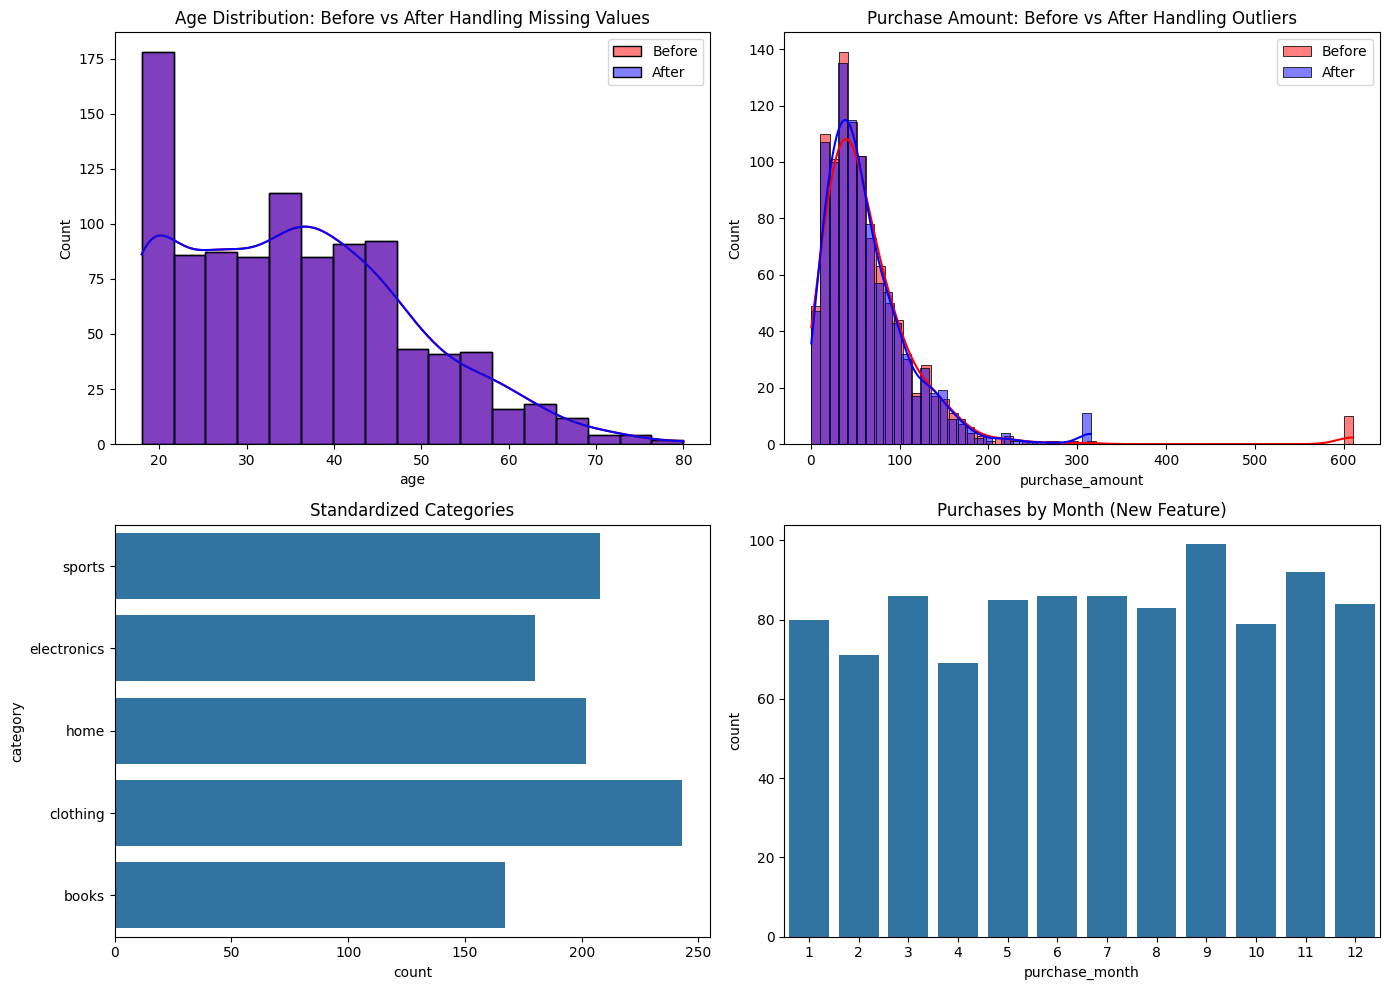


Data wrangling process completed and visualized!


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Generate sample dataset for an online retail store
np.random.seed(42)
n_samples = 1000

# Create customer data
customer_ids = np.arange(1, n_samples + 1)
age = np.random.normal(35, 15, n_samples).astype(int)
age = np.clip(age, 18, 80)  # Clip ages to reasonable values

# Introduce some missing values
# age[np.random.choice(n_samples, 50, replace=False)] = np.nan

# Gender with missing values
gender = np.random.choice(['Male', 'Female'], n_samples)
gender[np.random.choice(n_samples, 40, replace=False)] = np.nan

# Purchase amount with outliers
purchase_amount = np.random.gamma(2, 30, n_samples)
# Add some outliers
purchase_amount[np.random.choice(n_samples, 10, replace=False)] = purchase_amount.mean() * 10

# Category with inconsistent formatting
categories = np.random.choice(['electronics', 'clothing', 'home', 'books', 'sports'], n_samples)
# Create some inconsistent formatting
categories[np.random.choice(n_samples, 100, replace=False)] = [c.upper() for c in categories[:100]]
categories[np.random.choice(n_samples, 100, replace=False)] = [c.title() for c in categories[100:200]]

# Timestamp with different formats
from datetime import datetime, timedelta
base_date = datetime(2023, 1, 1)
dates = [(base_date + timedelta(days=np.random.randint(0, 365))).strftime('%Y-%m-%d') for _ in range(n_samples//2)]
dates.extend([(base_date + timedelta(days=np.random.randint(0, 365))).strftime('%m/%d/%Y') for _ in range(n_samples//2)])
np.random.shuffle(dates)

# Create the DataFrame
df = pd.DataFrame({
    'customer_id': customer_ids,
    'age': age,
    'gender': gender,
    'category': categories,
    'purchase_amount': purchase_amount,
    'purchase_date': dates
})

# Save to CSV
df.to_csv('retail_data.csv', index=False)
print("Sample dataset created: retail_data.csv")
print(df.head())

# Data Wrangling Process
print("\n=== Data Wrangling Process ===")

# 1. Initial data exploration
print("\n1. Initial Data Overview:")
print(f"Shape: {df.shape}")
print("\nData Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())
print("\nDescriptive Statistics:")
print(df.describe())

# 2. Handle missing values
print("\n2. Handling Missing Values:")
print("- Filling missing ages with median")
print("- Filling missing gender with 'Unknown'")

df_clean = df.copy()
df_clean['age'] = df_clean['age'].fillna(df_clean['age'].median())
df_clean['gender'] = df_clean['gender'].fillna('Unknown')

# 3. Format standardization
print("\n3. Standardizing Formats:")
print("- Converting all categories to lowercase")
print("- Standardizing date format")

df_clean['category'] = df_clean['category'].str.lower()

# Convert dates to standard format
def standardize_date(date_str):
    try:
        if '/' in date_str:
            return pd.to_datetime(date_str, format='%m/%d/%Y').strftime('%Y-%m-%d')
        else:
            return date_str
    except:
        return date_str

df_clean['purchase_date'] = df_clean['purchase_date'].apply(standardize_date)
df_clean['purchase_date'] = pd.to_datetime(df_clean['purchase_date'])

# 4. Handle outliers
print("\n4. Handling Outliers:")
print("- Capping purchase amounts at 99th percentile")

upper_limit = df_clean['purchase_amount'].quantile(0.99)
df_clean['purchase_amount'] = df_clean['purchase_amount'].clip(upper=upper_limit)

# 5. Feature engineering
print("\n5. Feature Engineering:")
print("- Creating month and year features from date")
print("- Creating age groups")

df_clean['purchase_month'] = df_clean['purchase_date'].dt.month
df_clean['purchase_year'] = df_clean['purchase_date'].dt.year

# Create age groups
def get_age_group(age):
    if age < 25:
        return 'Young'
    elif age < 40:
        return 'Adult'
    elif age < 60:
        return 'Middle-aged'
    else:
        return 'Senior'

df_clean['age_group'] = df_clean['age'].apply(get_age_group)

# 6. Show results of wrangling
print("\n6. Wrangled Data Overview:")
print(df_clean.head())
print("\nMissing Values After Wrangling:")
print(df_clean.isnull().sum())

# 7. Visualize the changes
plt.figure(figsize=(14, 10))

# Plot age distribution before and after
plt.subplot(2, 2, 1)
sns.histplot(df['age'].dropna(), kde=True, color='red', alpha=0.5, label='Before')
sns.histplot(df_clean['age'], kde=True, color='blue', alpha=0.5, label='After')
plt.title('Age Distribution: Before vs After Handling Missing Values')
plt.legend()

# Plot purchase amount distribution before and after
plt.subplot(2, 2, 2)
sns.histplot(df['purchase_amount'], kde=True, color='red', alpha=0.5, label='Before')
sns.histplot(df_clean['purchase_amount'], kde=True, color='blue', alpha=0.5, label='After')
plt.title('Purchase Amount: Before vs After Handling Outliers')
plt.legend()

# Plot category counts after standardization
plt.subplot(2, 2, 3)
sns.countplot(y=df_clean['category'])
plt.title('Standardized Categories')

# Plot purchase by month (new feature)
plt.subplot(2, 2, 4)
sns.countplot(x=df_clean['purchase_month'])
plt.title('Purchases by Month (New Feature)')

plt.tight_layout()
plt.savefig('data_wrangling_results.png')
plt.show()

print("\nData wrangling process completed and visualized!")